# 3.1 Operators based on first derivative

Edge detection is an image processing technique for finding the points of images that represent brightness variations or edges. It has many applications for image segmentation and data extraction that will be explained posteriorly on this course.  

There are different errors that we can find when edges are detected:

<img src="./images/edge_errors.jpg" width="400">

During this chapters, you are going to test and implement different edge detection methods. All of them are based in convolution, each has its pros and cons.

In this notebook, first-derivative based operators will be covered. This includes:

- Discrete approximations of a gradient operator
- The DroG operator

## Problem context - Edge detection for medical images

Medical images edge detection is an important work for object recognition (e.g., cancer) in the human organs such as lungs and prostate, and it is an essential pre-processing step in medical image segmentation.

<img src="./images/hospital_clinico.jpg" width="400">

Hospital Clínico, a very transited hospital in Málaga is asking local engineering students to join their research team. They are looking for a person with knowledge in image processing. To ensure it, they published 3 medical images: `medical_1.jpg`, `medical_2.jpg` and `medical_3.jpg`.  It is asked to make precise edge detection on both 3 images, also it is needed to provide an explanation of how it was made.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib
from ipywidgets import interact, fixed, widgets
matplotlib.rcParams['figure.figsize'] = (15.0, 15.0)

images_path = './images/'

To solve this, we are going to use plenty edge detection methods. They will be tested and compared between them in order to obtain best method.

**What to do?** First, **display provided images** to see what are we dealing with.

*As medical images does not provide color information, we are going to use border detection in greyscale images.  
There are different techniques for color image edge detection, like converting to YCrCb color space (appendix 2), or detecting edges on each RGB channel.*

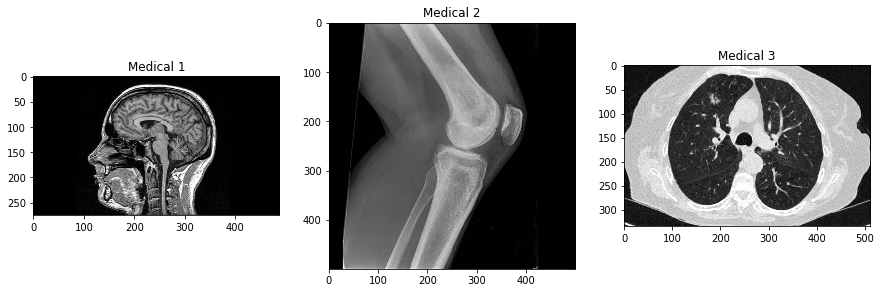

In [2]:
# Read the images
medical_1 = cv2.imread(images_path + 'medical_1.jpg', 0)
medical_2 = cv2.imread(images_path + 'medical_2.jpg', 0)
medical_3 = cv2.imread(images_path + 'medical_3.jpg', 0)

# And show them
plt.subplot(131)
plt.imshow(medical_1, cmap='gray')
plt.title('Medical 1')

plt.subplot(132)
plt.imshow(medical_2, cmap='gray')
plt.title('Medical 2')

plt.subplot(133)
plt.imshow(medical_3, cmap='gray')
plt.title('Medical 3')
plt.show()

### Discrete approximations of a gradient operator

Now, we are going to apply simple edge detection methods like discrete approximations of a **gradient operator**.
This methods are convolution-based, there are many known kernels that makes a good work.

An example of this is **sobel operator**. The operator uses two 3×3 kernels which are convolved with the original image to calculate approximations of the derivatives – one for horizontal changes, and one for vertical.$\\[5pt]$

$$S_x=\frac{1}{4}\left(\begin{matrix} 1 & 0 & -1 \\ 2 & 0 & -2 \\ 1 & 0 & -1 \end{matrix} \right) \; \;S_y= \frac{1}{4}\left(\begin{matrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{matrix} \right) \\[20pt]$$

In this way, it is possible to obtain the gradient of the image:$\\[5pt]$ $$ \nabla I(x,y)= \begin{bmatrix} I \otimes S_x \\ I \otimes S_y \end{bmatrix}$$

**What to do?** Compute both derivatives and display them along with original image.

*Notice derivative image values can be positive and negatives, this is caused by negative values in a kernel. This implies that desired depth of the destination image (`ddepth`) has to be at least a signed data type.*

(<matplotlib.axes._subplots.AxesSubplot at 0x7f839f911be0>,
 Text(0.5, 1.0, 'Vertical derivative'))

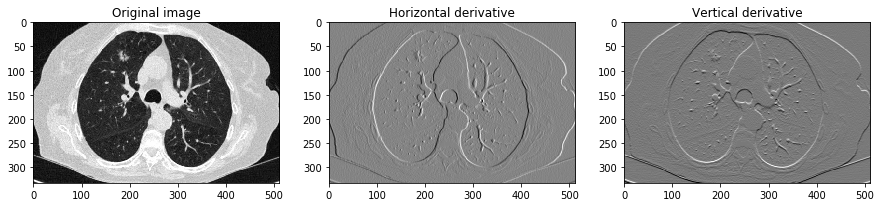

In [3]:
# Read the image
image = cv2.imread(images_path + 'medical_3.jpg', 0)

# Define horizontal and vertical kernels
kernel_h = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])*1/4
kernel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])*1/4

# Apply convolution
d_horizontal = cv2.filter2D(image,cv2.CV_16S,kernel_h) # Using ddepth=cv2.CV_16S
d_vertical = cv2.filter2D(image,cv2.CV_16S,kernel_v)

# And show them!
plt.subplot(131),plt.imshow(image, cmap='gray'),plt.title('Original image')
plt.subplot(132),plt.imshow(d_horizontal, cmap='gray'),plt.title('Horizontal derivative')
plt.subplot(133),plt.imshow(d_vertical, cmap='gray'),plt.title('Vertical derivative')

The resultant edge image is the gradient magnitude:

$$|\nabla I(x,y)| = \sqrt{(I \otimes S_x)^2 + (I \otimes S_y)^2} \approx |I \otimes S_x| + |I \otimes S_y|$$

**What to do?** Complete **edge_detection_chart** that cumputes gradient image of `image` using `kernel_h` and `kernel_v` (kernels for horizontal and vertical derivatives) and **binarize resultant image** (final edges image) using `threshold`. Then display `image`, gradient image and final edge image.

*Tip: you should [binarize](https://docs.opencv.org/2.4/modules/core/doc/operations_on_arrays.html) gradient image before thresholding.*

In [4]:
def edge_detection_chart(image, kernel_h, kernel_v, threshold):
    """ Computed the gradient of the image, binarizes and display it.   
    
        Args:
            image: Input image
            kernel_h: kernel for horizontal derivative
            kernel_v: kernel for vertical derivative
            threshold: threshold value for binarization
    """
    
    # Compute derivatives
    d_h = cv2.filter2D(image,cv2.CV_16S,kernel_h)
    d_v = cv2.filter2D(image,cv2.CV_16S,kernel_v)
    
    # Compute gradient
    gradient_image = np.add(np.absolute(d_h),np.absolute(d_v))
    
    #Normalize gradient
    norm_gradient = np.copy(image)
    norm_gradient = cv2.normalize(gradient_image,norm_gradient, 0, 255, cv2.NORM_MINMAX)
    
    # Threshold to get edges
    ret, edges = cv2.threshold(norm_gradient,threshold,255,cv2.THRESH_BINARY)
    
    # Show the initial image
    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title('Original image')
    
    # Show the gradient image
    plt.subplot(132)
    plt.imshow(norm_gradient, cmap='gray')
    plt.title('Gradient image')
    
    # Show edges image
    plt.subplot(133)
    plt.imshow(edges, cmap='gray')
    plt.title('Edges detected')

**What to do?** Try this method with different size Sobel kernels (3x3, 5x5, ...) and with other operators (Roberts, Prewitt, ...). $\\[5pt]$  
After that, **answer following questions**:

- What happens if we use a bigger kernel?
- There are differences between Sobel and other operators?
- What errors appear using those operators?
- Why kernels usually are divided by a number? (e.g. 3x3 Sobel is divided by 4)

In [5]:
# Read image
image = cv2.imread(images_path + 'medical_3.jpg', 0)

# Define kernel (Sobel, Roberts, Prewitt, ...)
kernel_h = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])*1/4
kernel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])*1/4

#Interact with your code!
interact( edge_detection_chart, image=fixed(image), kernel_h=fixed(kernel_h), kernel_v=fixed(kernel_v), threshold=(0,255,10))

interactive(children=(IntSlider(value=120, description='threshold', max=255, step=10), Output()), _dom_classes…

<function __main__.edge_detection_chart(image, kernel_h, kernel_v, threshold)>

### DroG operator

Now, **DroG operator** (Derivative of Gaussian) is going to be implemented.

Something similar as gaussian smoothing vs neighborhood averaging happens on edge detection. Instead of using predefined kernels, it is possible to derivate the gaussian function. This way, we get a kernel that applies smoothing and edge detection (preserving edges as we use gaussian distribution) at the same time.

$\hspace{8cm}$2-D gaussian:  
$$g_{\sigma}(x,y) = \frac{1}{2\pi\sigma^2}exp\left(-\frac{x^2+y^2}{2\sigma^2}\right)\\[20pt]$$
$\hspace{8cm}$2-D DroG:
$$DroG(x,y) = \nabla \left[ g_\sigma (x,y) \right] = \begin{bmatrix} \frac{-xg_\sigma(x,y)}{\sigma^2} \\ \frac{-yg_\sigma(x,y)}{\sigma^2}\end{bmatrix}$$

**What to do?** Complete **gaussian_kernel** that constructs a Gaussian filter and then derivates it, getting DroG template. Finally, it calls *edge_detection_chart* using that template. The input is an image, the kernel aperture size, gaussian standard deviation and gradient image binaritazion threshold.


In [12]:
def gaussian_kernel(image, w_kernel, sigma, threshold):
    """ Construct the DroG operator and call edge_detection_chart.   
    
        Args:
            image: Input image
            w_kernel: Kernel aperture size
            sigma: Standard deviation of the Gaussian distribution
            threshold: Threshold value for binarization
    """
    
    # Create Gaussian filter
    s = sigma
    w = w_kernel
    kernel_1D = [np.exp(-z*z/(2*s*s))/np.sqrt(2*np.pi*s*s) for z in range(-w,w+1)]
    
    # Define x and y axis
    x = np.arange(-w,w+1)
    y = np.vstack(x)
    
    # Construct DroG
    kernel_h = x*(-np.outer(kernel_1D,kernel_1D))/s**2 # Horizontal derivative
    kernel_v = y*(-np.outer(kernel_1D,kernel_1D))/s**2 # Vertical derivative
    
    # Call edge detection chart using DroG
    edge_detection_chart(image,kernel_h,kernel_v,threshold)

**What to do?** Try this method and play with interactive parameters.$\\[5pt]$      
After that, **answer following questions**:

- What happens if a bigger kernel is used?
- What kind of errors appear and disappear whenever sigma is modified?
- Why gradient image have lower values than original image? *Tip: [image normalization](https://stackoverflow.com/questions/40645985/opencv-python-normalize-image/42164670)* 

In [10]:
image = cv2.imread(images_path + 'medical_3.jpg', 0)

interact(gaussian_kernel, image=fixed(image), w_kernel=(1,5,1), sigma=(0.4,5,0.5), threshold=(0,255,10))

interactive(children=(IntSlider(value=3, description='w_kernel', max=5, min=1), FloatSlider(value=2.4, descrip…

<function __main__.gaussian_kernel(image, w_kernel, sigma, threshold)>

## Conclusion

Perfect! Now you can see more aplications of convolution and how it works clearly. In this notebook you

- learned basic operators for edge detection.
- how to construct a DroG kernel in a efficient way.
- played a bit with them in the context of medical images, discovering some real and important utilities.